<a href="https://colab.research.google.com/github/thaoothuuu/E-Commerce/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from datetime import datetime
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import datetime

# Read file to dataframe

In [149]:
# read file Order Detail to dataframe
df_order = pd.read_csv(r'/content/drive/My Drive/DATA/Order Details.csv')
df_order.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [150]:
# read file List of Orders to dataframe
df_list_order = pd.read_csv('/content/drive/My Drive/DATA/List of Orders.csv')
df_list_order.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [151]:
# read file Sales target to dataframe
df_target = pd.read_csv('/content/drive/My Drive/DATA/Sales target.csv')
df_target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


# Prepare data

## List of order

In [152]:
df_list_order.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [153]:
# check data type
df_list_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB


In [154]:
# create column DateOrder convert column Order Date to datetime
df_list_order['DateOrder'] = pd.to_datetime(df_list_order['Order Date'], dayfirst=True)

In [155]:
# drop column Order Date
df_list_order.drop('Order Date', axis = 1, inplace = True)

In [156]:
# check data type after convert data type
df_list_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   CustomerName  500 non-null    object        
 2   State         500 non-null    object        
 3   City          500 non-null    object        
 4   DateOrder     500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 22.0+ KB


In [157]:
df_list_order.head()

,Order ID,CustomerName,State,City,DateOrder
0,B-25601,Bharat,Gujarat,Ahmedabad,2018-04-01
1,B-25602,Pearl,Maharashtra,Pune,2018-04-01
2,B-25603,Jahan,Madhya Pradesh,Bhopal,2018-04-03
3,B-25604,Divsha,Rajasthan,Jaipur,2018-04-03
4,B-25605,Kasheen,West Bengal,Kolkata,2018-04-05


In [158]:
# check missing values
df_list_order.isnull()

,Order ID,CustomerName,State,City,DateOrder
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
555,True,True,True,True,True
556,True,True,True,True,True
557,True,True,True,True,True
558,True,True,True,True,True


In [159]:
# check number of missing values
df_list_order.isnull().sum()

Order ID        60
CustomerName    60
State           60
City            60
DateOrder       60
dtype: int64

In [160]:
# percent of missing values
df_list_order.isnull().sum()/df_list_order.count()

Order ID        0.12
CustomerName    0.12
State           0.12
City            0.12
DateOrder       0.12
dtype: float64

In [161]:
# check missing value of column City
df_list_order[df_list_order['City'].isnull()]

,Order ID,CustomerName,State,City,DateOrder
500,NaN,NaN,NaN,NaN,NaT
501,NaN,NaN,NaN,NaN,NaT
502,NaN,NaN,NaN,NaN,NaT
503,NaN,NaN,NaN,NaN,NaT
504,NaN,NaN,NaN,NaN,NaT
505,NaN,NaN,NaN,NaN,NaT
506,NaN,NaN,NaN,NaN,NaT
507,NaN,NaN,NaN,NaN,NaT
508,NaN,NaN,NaN,NaN,NaT
509,NaN,NaN,NaN,NaN,NaT


In [162]:
# drop rows contains missing value and check number of remain missing value
df_list_order.dropna(axis = 0,inplace = True)
df_list_order.isnull().sum()

Order ID        0
CustomerName    0
State           0
City            0
DateOrder       0
dtype: int64

## Order Details

In [163]:
df_order.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [164]:
# check central tendency
df_order.describe()

,Amount,Profit,Quantity
count,1500.000000,1500.000000,1500.000000
mean,287.668000,15.970000,3.743333
std,461.050488,169.140565,2.184942
min,4.000000,-1981.000000,1.000000
25%,45.000000,-9.250000,2.000000
50%,118.000000,9.000000,3.000000
75%,322.000000,38.000000,5.000000
max,5729.000000,1698.000000,14.000000


In [165]:
# check missing values and percent of missing values
df_order.isnull()
df_order.isnull().sum()
df_order.isnull().sum()/df_order.count()

Order ID        0.0
Amount          0.0
Profit          0.0
Quantity        0.0
Category        0.0
Sub-Category    0.0
dtype: float64

## Sales target

In [166]:
df_target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [167]:
# check data type
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  36 non-null     object 
 1   Category             36 non-null     object 
 2   Target               36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


In [168]:
# create function convert format Month of Order Date
def convert(date_time):
    month = date_time[:3]
    year = '20'+date_time[4:]
    date = month+'-'+year
    datetime_str = datetime.datetime.strptime(date, "%b-%Y").strftime("%Y-%m-%d")
    return datetime_str



In [169]:
# create column DateOrder convert format column Month of Order Date and drop column Month of Order Date
df_target['Date'] = df_target['Month of Order Date'].apply(convert)
df_target['Month of Order Date'] = df_target['Date']
df_target.drop(labels= ['Date'], axis=1, inplace= True)

In [170]:
# create column DateOrder convert column Month of Order Date to datetime
df_target['DateOrder'] = pd.to_datetime(df_target['Month of Order Date'])
df_target.drop('Month of Order Date', axis=1, inplace=True)

In [171]:
# check data type
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Category   36 non-null     object        
 1   Target     36 non-null     float64       
 2   DateOrder  36 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 992.0+ bytes


In [172]:
df_target.head()

,Category,Target,DateOrder
0,Furniture,10400.0,2018-04-01
1,Furniture,10500.0,2018-05-01
2,Furniture,10600.0,2018-06-01
3,Furniture,10800.0,2018-07-01
4,Furniture,10900.0,2018-08-01


In [173]:
# check central tendency of dataframe
df_target.describe()

,Target
count,36.000000
mean,12108.333333
std,2667.837541
min,9000.000000
25%,10050.000000
50%,11450.000000
75%,14500.000000
max,16000.000000


In [174]:
# check missing values and percent of missing values
df_order.isnull()
df_order.isnull().sum()
df_order.isnull().sum()/df_order.count()

Order ID        0.0
Amount          0.0
Profit          0.0
Quantity        0.0
Category        0.0
Sub-Category    0.0
dtype: float64

# Sale Trend

## Order by orderID

In [175]:
df_list_order.head()

,Order ID,CustomerName,State,City,DateOrder
0,B-25601,Bharat,Gujarat,Ahmedabad,2018-04-01
1,B-25602,Pearl,Maharashtra,Pune,2018-04-01
2,B-25603,Jahan,Madhya Pradesh,Bhopal,2018-04-03
3,B-25604,Divsha,Rajasthan,Jaipur,2018-04-03
4,B-25605,Kasheen,West Bengal,Kolkata,2018-04-05


In [176]:
df_order.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [177]:
# create dataframe from dataframe df_order and group by Order ID and merge to dataframe df_list_order
df_order_by_orderID = pd.merge(df_order.groupby('Order ID').sum(), df_list_order, on = 'Order ID', how = 'inner').drop_duplicates()

In [178]:
# create table top 5 customer with highest sales
print(tabulate(df_order_by_orderID.sort_values(by='Amount', ascending=False).iloc[:5], headers= df_order_by_orderID.columns, tablefmt="fancy_grid", showindex="always"))

╒═════╤════════════╤══════════╤══════════╤════════════╤════════════════╤════════════════╤═══════════╤═════════════════════╕
│     │ Order ID   │   Amount │   Profit │   Quantity │ CustomerName   │ State          │ City      │ DateOrder           │
╞═════╪════════════╪══════════╪══════════╪════════════╪════════════════╪════════════════╪═══════════╪═════════════════════╡
│ 454 │ B-26055    │     8502 │      683 │         57 │ Yaanvi         │ Madhya Pradesh │ Indore    │ 2019-03-10 00:00:00 │
├─────┼────────────┼──────────┼──────────┼────────────┼────────────────┼────────────────┼───────────┼─────────────────────┤
│ 354 │ B-25955    │     6339 │      669 │         46 │ Soumya         │ Maharashtra    │ Pune      │ 2019-01-16 00:00:00 │
├─────┼────────────┼──────────┼──────────┼────────────┼────────────────┼────────────────┼───────────┼─────────────────────┤
│ 392 │ B-25993    │     6026 │      864 │         25 │ Harshal        │ Delhi          │ Delhi     │ 2019-02-03 00:00:00 │
├─────┼─

## Order by Month and Year

In [179]:
df_order_by_orderID.head()

,Order ID,Amount,Profit,Quantity,CustomerName,State,City,DateOrder
0,B-25601,1429.0,-1218.0,19,Bharat,Gujarat,Ahmedabad,2018-04-01
1,B-25602,3889.0,975.0,22,Pearl,Maharashtra,Pune,2018-04-01
2,B-25603,2025.0,-180.0,25,Jahan,Madhya Pradesh,Bhopal,2018-04-03
3,B-25604,222.0,22.0,11,Divsha,Rajasthan,Jaipur,2018-04-03
4,B-25605,75.0,0.0,7,Kasheen,West Bengal,Kolkata,2018-04-05


In [180]:
# create Year column
df_order_by_orderID['Year'] = pd.DatetimeIndex(df_order_by_orderID['DateOrder']).year 
# create Month column
df_order_by_orderID['Month'] = pd.DatetimeIndex(df_order_by_orderID['DateOrder']).month
# Dataframe represent Amount, Profit group by year and month
df_order_by_month = df_order_by_orderID[['Year','Month', 'Amount','Profit']].groupby(['Year','Month']).sum().sort_values(['Year','Month'])

In [181]:
df_order_by_month

Amount   Profit
Year Month                  
2018 4      32726.0  -3960.0
     5      28545.0  -3584.0
     6      23658.0  -4970.0
     7      12966.0  -2138.0
     8      30899.0  -2180.0
     9      26628.0  -4963.0
     10     31615.0   3093.0
     11     48086.0  11619.0
     12     37579.0   5284.0
2019 1      61439.0   9760.0
     2      38424.0   5917.0
     3      58937.0  10077.0

In [182]:
df_order_by_orderID.drop(['Year','Month'],axis=1,inplace=True)
df_order_by_orderID['YearMonth'] = df_order_by_orderID['DateOrder'].apply(lambda x:x.strftime('%Y-%m'))
order_by_yearmonth = df_order_by_orderID.groupby('YearMonth').sum()
order_by_yearmonth = order_by_yearmonth.reset_index()

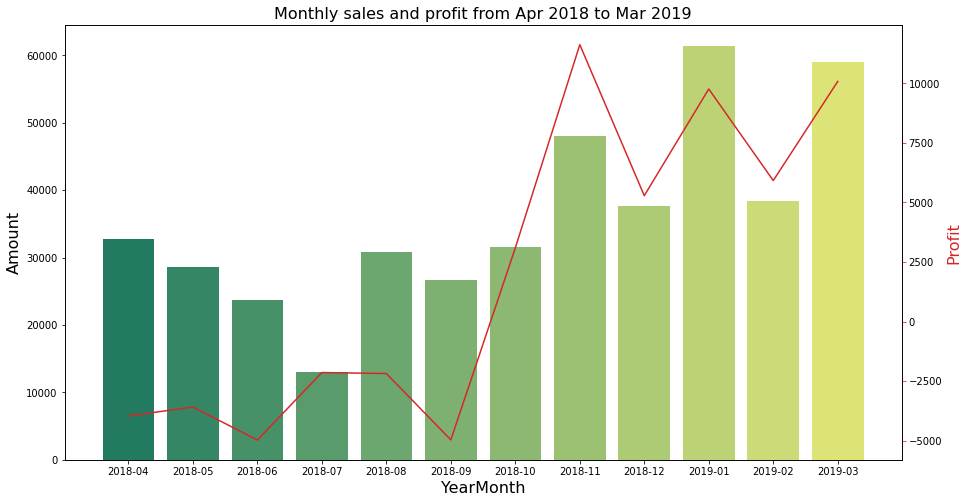

In [183]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(15,8))
color = 'tab:green'
#bar plot creation
ax1.set_title('Monthly sales and profit from Apr 2018 to Mar 2019', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Sales', fontsize=16)
ax1 = sns.barplot(x='YearMonth', y='Amount', data = order_by_yearmonth, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Profit', fontsize=16, color=color)
ax2 = sns.lineplot(x='YearMonth', y='Profit', data = order_by_yearmonth, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

## Order by State and City

In [184]:
df_order_by_orderID.head()

,Order ID,Amount,Profit,Quantity,CustomerName,State,City,DateOrder,YearMonth
0,B-25601,1429.0,-1218.0,19,Bharat,Gujarat,Ahmedabad,2018-04-01,2018-04
1,B-25602,3889.0,975.0,22,Pearl,Maharashtra,Pune,2018-04-01,2018-04
2,B-25603,2025.0,-180.0,25,Jahan,Madhya Pradesh,Bhopal,2018-04-03,2018-04
3,B-25604,222.0,22.0,11,Divsha,Rajasthan,Jaipur,2018-04-03,2018-04
4,B-25605,75.0,0.0,7,Kasheen,West Bengal,Kolkata,2018-04-05,2018-04


In [185]:
# create dataframe represent total Amount, Profit group by State
Order_by_State = df_order_by_orderID[['State','Amount','Profit']].groupby(['State']).sum()

In [186]:
Order_by_State
Order_by_State = Order_by_State.reset_index()

In [187]:
fig = px.bar(Order_by_State, y='Amount', x='State',
             title="Total Sales by State", 
             color_discrete_sequence=["springgreen"],
             template='plotly_white')


fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True

fig.show()

In [188]:
# create dataframe represent total Amount, Profit group by State and City
Order_by_City = df_order_by_orderID[['State','City','Amount','Profit']].groupby(['State', 'City']).sum()

In [189]:
Order_by_City

Amount  Profit
State             City                               
Andhra Pradesh    Hyderabad           13256.0  -496.0
Bihar             Patna               12943.0  -321.0
Delhi             Delhi               22531.0  2987.0
Goa               Goa                  6705.0   370.0
Gujarat           Ahmedabad           14230.0  -880.0
                  Surat                6828.0  1345.0
Haryana           Chandigarh           8863.0  1325.0
Himachal Pradesh  Simla                8666.0   656.0
Jammu and Kashmir Kashmir             10829.0     8.0
Karnataka         Bangalore           15058.0   645.0
Kerala            Thiruvananthapuram  13459.0  1871.0
Madhya Pradesh    Bhopal              23583.0   871.0
                  Delhi                2488.0   521.0
                  Indore              79069.0  4159.0
Maharashtra       Mumbai              61867.0  1637.0
                  Pune                33481.0  4539.0
Nagaland          Kohima              11903.0   148.0
Punjab            Amritsar             4507.0   544.0
                  Chandigarh          12279.0 -1153.0
Rajasthan         Jaipur              10076.0  -753.0
                  Udaipur             11073.0  2010.0
Sikkim            Gangtok              5276.0   401.0
Tamil Nadu        Chennai              6087.0 -2216.0
Uttar Pradesh     Allahabad           16857.0  3081.0
                  Lucknow              5502.0   156.0
West Bengal       Kolkata             14086.0  2500.0

## Order by Category and sub-category

In [190]:
df_order.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [191]:
Order_by_Category = df_order.groupby(['Category']).sum()
Order_by_Category = Order_by_Category.reset_index()

In [192]:
fig = px.pie(Order_by_Category, values='Quantity', names='Category', color='Category',
             color_discrete_map={'Clothing':'cyan',
                                 'Electronics':'royalblue',
                                 'Furniture':'darkblue'},
            title='Total Quantity Sold per Category')
fig.show()

In [193]:
# create Dataframe represent total Amount, Profit,Quantity group by Category and sub-category
Order_by_Sub_Category = df_order.groupby(['Category','Sub-Category']).sum()

In [194]:
Order_by_Sub_Category

Amount  Profit  Quantity
Category    Sub-Category                               
Clothing    Hankerchief       14608.0  2098.0       754
            Kurti              3361.0   181.0       164
            Leggings           2106.0   260.0       186
            Saree             53511.0   352.0       782
            Shirt              7555.0  1131.0       271
            Skirt              1946.0   235.0       248
            Stole             18546.0  2559.0       671
            T-shirt            7382.0  1500.0       305
            Trousers          30039.0  2847.0       135
Electronics Accessories       21728.0  3559.0       262
            Electronic Games  39168.0 -1236.0       297
            Phones            46119.0  2207.0       304
            Printers          58252.0  5964.0       291
Furniture   Bookcases         56861.0  4888.0       297
            Chairs            34222.0   577.0       277
            Furnishings       13484.0   844.0       310
            Tables            22614.0 -4011.0        61

## Compare actual sales and sales target

### Clothing

In [195]:
# create dataframe from df_order with category is Clothing
Clothing = df_order[df_order['Category'] == 'Clothing']
# create dataframe from Clothing groupby OrderID and merge with df_list_order
Clothing_order = pd.merge(Clothing[['Order ID','Amount']].groupby('Order ID').sum(), df_list_order[['Order ID','DateOrder']], on = 'Order ID', how = 'inner').drop_duplicates()
Clothing_order.head()

,Order ID,Amount,DateOrder
0,B-25601,74.0,2018-04-01
1,B-25602,680.0,2018-04-01
2,B-25603,2001.0,2018-04-03
3,B-25604,222.0,2018-04-03
4,B-25605,75.0,2018-04-05


In [196]:
# create dataframe from dataframe Clothing groupby YearMonth
Clothing_order['YearMonth'] = Clothing_order['DateOrder'].apply(lambda x:x.strftime('%Y-%m'))
Clothing_sales = Clothing_order.groupby('YearMonth').sum()
Clothing_sales

,Amount
YearMonth,
2018-04,13478.0
2018-05,9518.0
2018-06,8782.0
2018-07,2981.0
2018-08,11822.0
2018-09,10717.0
2018-10,11488.0
2018-11,16270.0
2018-12,9545.0


In [197]:
# create dataframe from df_target with category is Clothing
Clothing_target = df_target[df_target['Category'] == 'Clothing']
Clothing_target['YearMonth'] = Clothing_target['DateOrder'].apply(lambda x:x.strftime('%Y-%m'))
Clothing_target.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Category,Target,DateOrder,YearMonth
12,Clothing,12000.0,2018-04-01,2018-04
13,Clothing,12000.0,2018-05-01,2018-05
14,Clothing,12000.0,2018-06-01,2018-06
15,Clothing,14000.0,2018-07-01,2018-07
16,Clothing,14000.0,2018-08-01,2018-08


In [198]:
Clothing_target

,Category,Target,DateOrder,YearMonth
12,Clothing,12000.0,2018-04-01,2018-04
13,Clothing,12000.0,2018-05-01,2018-05
14,Clothing,12000.0,2018-06-01,2018-06
15,Clothing,14000.0,2018-07-01,2018-07
16,Clothing,14000.0,2018-08-01,2018-08
17,Clothing,14000.0,2018-09-01,2018-09
18,Clothing,16000.0,2018-10-01,2018-10
19,Clothing,16000.0,2018-11-01,2018-11
20,Clothing,16000.0,2018-12-01,2018-12
21,Clothing,16000.0,2019-01-01,2019-01


In [199]:
# merge 2 dataframe
Clothing_compare = pd.merge(Clothing_sales,Clothing_target[['Target','YearMonth']], on='YearMonth', how='inner').drop_duplicates()
# create table actual sales and target sales
print(tabulate(Clothing_compare, headers= Clothing_compare.columns, tablefmt="fancy_grid", showindex="always"))

╒════╤═════════════╤══════════╤══════════╕
│    │ YearMonth   │   Amount │   Target │
╞════╪═════════════╪══════════╪══════════╡
│  0 │ 2018-04     │    13478 │    12000 │
├────┼─────────────┼──────────┼──────────┤
│  1 │ 2018-05     │     9518 │    12000 │
├────┼─────────────┼──────────┼──────────┤
│  2 │ 2018-06     │     8782 │    12000 │
├────┼─────────────┼──────────┼──────────┤
│  3 │ 2018-07     │     2981 │    14000 │
├────┼─────────────┼──────────┼──────────┤
│  4 │ 2018-08     │    11822 │    14000 │
├────┼─────────────┼──────────┼──────────┤
│  5 │ 2018-09     │    10717 │    14000 │
├────┼─────────────┼──────────┼──────────┤
│  6 │ 2018-10     │    11488 │    16000 │
├────┼─────────────┼──────────┼──────────┤
│  7 │ 2018-11     │    16270 │    16000 │
├────┼─────────────┼──────────┼──────────┤
│  8 │ 2018-12     │     9545 │    16000 │
├────┼─────────────┼──────────┼──────────┤
│  9 │ 2019-01     │    13466 │    16000 │
├────┼─────────────┼──────────┼──────────┤
│ 10 │ 2019

In [200]:
Clothing_compare['Actual_Sales'] = Clothing_compare['Amount']

fig = go.Figure(data=[
    go.Bar(name='Target', x=Clothing_compare['YearMonth'], y=Clothing_compare['Target'],
          marker_color='#2b2d42'),
    go.Bar(name='Actual Sales', x=Clothing_compare['YearMonth'], y=Clothing_compare['Actual_Sales'],
          marker_color='#d90429')
])

fig.update_layout(title_text='Actual vs Target Sales of Clothing',
                 template='plotly_white')

fig.update_xaxes(title_text='YearMonth')
fig.update_yaxes(title_text='Amount')



fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True

fig.show()

### Furniture

In [201]:
# create dataframe from df_order with category is Furniture
Furniture = df_order[df_order['Category'] == 'Furniture']
# create dataframe from Furniture groupby OrderID and merge with df_list_order
Furniture_order = pd.merge(Furniture[['Order ID','Amount']].groupby('Order ID').sum(), df_list_order[['Order ID','DateOrder']], on = 'Order ID', how = 'inner').drop_duplicates()
Furniture_order.head()

,Order ID,Amount,DateOrder
0,B-25601,1275.0,2018-04-01
1,B-25603,24.0,2018-04-03
2,B-25608,1840.0,2018-04-08
3,B-25610,30.0,2018-04-09
4,B-25612,259.0,2018-04-12


In [202]:
# create dataframe from dataframe Furniture groupby YearMonth
Furniture_order['YearMonth'] = Furniture_order['DateOrder'].apply(lambda x:x.strftime('%Y-%m'))
Furniture_sales = Furniture_order.groupby('YearMonth').sum()
Furniture_sales

,Amount
YearMonth,
2018-04,8121.0
2018-05,6220.0
2018-06,5532.0
2018-07,3483.0
2018-08,9538.0
2018-09,8704.0
2018-10,6766.0
2018-11,15165.0
2018-12,9474.0


In [203]:
# create dataframe from df_target with category is Furniture
Furniture_target = df_target[df_target['Category'] == 'Furniture']
Furniture_target['YearMonth'] = Furniture_target['DateOrder'].apply(lambda x:x.strftime('%Y-%m'))
Furniture_target.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Category,Target,DateOrder,YearMonth
0,Furniture,10400.0,2018-04-01,2018-04
1,Furniture,10500.0,2018-05-01,2018-05
2,Furniture,10600.0,2018-06-01,2018-06
3,Furniture,10800.0,2018-07-01,2018-07
4,Furniture,10900.0,2018-08-01,2018-08


In [204]:
# merge 2 dataframe
Furniture_compare = pd.merge(Furniture_sales,Furniture_target[['Target','YearMonth']], on='YearMonth', how='inner').drop_duplicates()
# create table actual sales and target sales
print(tabulate(Furniture_compare, headers= Furniture_compare.columns, tablefmt="fancy_grid", showindex="always"))

╒════╤═════════════╤══════════╤══════════╕
│    │ YearMonth   │   Amount │   Target │
╞════╪═════════════╪══════════╪══════════╡
│  0 │ 2018-04     │     8121 │    10400 │
├────┼─────────────┼──────────┼──────────┤
│  1 │ 2018-05     │     6220 │    10500 │
├────┼─────────────┼──────────┼──────────┤
│  2 │ 2018-06     │     5532 │    10600 │
├────┼─────────────┼──────────┼──────────┤
│  3 │ 2018-07     │     3483 │    10800 │
├────┼─────────────┼──────────┼──────────┤
│  4 │ 2018-08     │     9538 │    10900 │
├────┼─────────────┼──────────┼──────────┤
│  5 │ 2018-09     │     8704 │    11000 │
├────┼─────────────┼──────────┼──────────┤
│  6 │ 2018-10     │     6766 │    11100 │
├────┼─────────────┼──────────┼──────────┤
│  7 │ 2018-11     │    15165 │    11300 │
├────┼─────────────┼──────────┼──────────┤
│  8 │ 2018-12     │     9474 │    11400 │
├────┼─────────────┼──────────┼──────────┤
│  9 │ 2019-01     │    21257 │    11500 │
├────┼─────────────┼──────────┼──────────┤
│ 10 │ 2019

In [205]:
Furniture_compare['Actual_Sales'] = Furniture_compare['Amount']

fig = go.Figure(data=[
    go.Bar(name='Target', x=Furniture_compare['YearMonth'], y=Furniture_compare['Target'],
          marker_color='#2b2d42'),
    go.Bar(name='Actual Sales', x=Furniture_compare['YearMonth'], y=Furniture_compare['Actual_Sales'],
          marker_color='#d90429')
])

fig.update_layout(title_text='Actual vs Target Sales of Furniture',
                 template='plotly_white')

fig.update_xaxes(title_text='YearMonth')
fig.update_yaxes(title_text='Amount')



fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True

fig.show()

### Electronics

In [206]:
# create dataframe from df_order with category is Electronics
Electronics = df_order[df_order['Category'] == 'Electronics']
# create dataframe from Electronics groupby OrderID and merge with df_list_order
Electronics_order = pd.merge(Electronics[['Order ID','Amount']].groupby('Order ID').sum(), df_list_order[['Order ID','DateOrder']], on = 'Order ID', how = 'inner').drop_duplicates()
Electronics_order.head()

,Order ID,Amount,DateOrder
0,B-25601,80.0,2018-04-01
1,B-25602,3209.0,2018-04-01
2,B-25608,856.0,2018-04-08
3,B-25609,485.0,2018-04-09
4,B-25610,1925.0,2018-04-09


In [207]:
# create dataframe from dataframe Electronics groupby YearMonth
Electronics_order['YearMonth'] = Electronics_order['DateOrder'].apply(lambda x:x.strftime('%Y-%m'))
Electronics_sales = Electronics_order.groupby('YearMonth').sum()
Electronics_sales

,Amount
YearMonth,
2018-04,11127.0
2018-05,12807.0
2018-06,9344.0
2018-07,6502.0
2018-08,9539.0
2018-09,7207.0
2018-10,13361.0
2018-11,16651.0
2018-12,18560.0


In [208]:
# create dataframe from df_target with category is Electronics
Electronics_target = df_target[df_target['Category'] == 'Electronics']
Electronics_target['YearMonth'] = Electronics_target['DateOrder'].apply(lambda x:x.strftime('%Y-%m'))
Electronics_target.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Category,Target,DateOrder,YearMonth
24,Electronics,9000.0,2018-04-01,2018-04
25,Electronics,9000.0,2018-05-01,2018-05
26,Electronics,9000.0,2018-06-01,2018-06
27,Electronics,9000.0,2018-07-01,2018-07
28,Electronics,9000.0,2018-08-01,2018-08


In [209]:
# merge 2 dataframe
Electronics_compare = pd.merge(Electronics_sales,Electronics_target[['Target','YearMonth']], on='YearMonth', how='inner').drop_duplicates()
# create table actual sales and target sales
print(tabulate(Electronics_compare, headers= Electronics_compare.columns, tablefmt="fancy_grid", showindex="always"))

╒════╤═════════════╤══════════╤══════════╕
│    │ YearMonth   │   Amount │   Target │
╞════╪═════════════╪══════════╪══════════╡
│  0 │ 2018-04     │    11127 │     9000 │
├────┼─────────────┼──────────┼──────────┤
│  1 │ 2018-05     │    12807 │     9000 │
├────┼─────────────┼──────────┼──────────┤
│  2 │ 2018-06     │     9344 │     9000 │
├────┼─────────────┼──────────┼──────────┤
│  3 │ 2018-07     │     6502 │     9000 │
├────┼─────────────┼──────────┼──────────┤
│  4 │ 2018-08     │     9539 │     9000 │
├────┼─────────────┼──────────┼──────────┤
│  5 │ 2018-09     │     7207 │     9000 │
├────┼─────────────┼──────────┼──────────┤
│  6 │ 2018-10     │    13361 │     9000 │
├────┼─────────────┼──────────┼──────────┤
│  7 │ 2018-11     │    16651 │     9000 │
├────┼─────────────┼──────────┼──────────┤
│  8 │ 2018-12     │    18560 │     9000 │
├────┼─────────────┼──────────┼──────────┤
│  9 │ 2019-01     │    26716 │    16000 │
├────┼─────────────┼──────────┼──────────┤
│ 10 │ 2019

In [210]:
Electronics_compare['Actual_Sales'] = Electronics_compare['Amount']

fig = go.Figure(data=[
    go.Bar(name='Target', x=Electronics_compare['YearMonth'], y=Electronics_compare['Target'],
          marker_color='#2b2d42'),
    go.Bar(name='Actual Sales', x=Electronics_compare['YearMonth'], y=Electronics_compare['Actual_Sales'],
          marker_color='#d90429')
])

fig.update_layout(title_text='Actual vs Target Sales of Electronics',
                 template='plotly_white')

fig.update_xaxes(title_text='YearMonth')
fig.update_yaxes(title_text='Amount')



fig.layout.xaxis.fixedrange = True
fig.layout.yaxis.fixedrange = True

fig.show()